In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# 7282_1.csv has 35912 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('Datafiniti_Hotel_Reviews_Jun19.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = '7282_1.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 26 columns


In [ ]:
df1.head(5)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

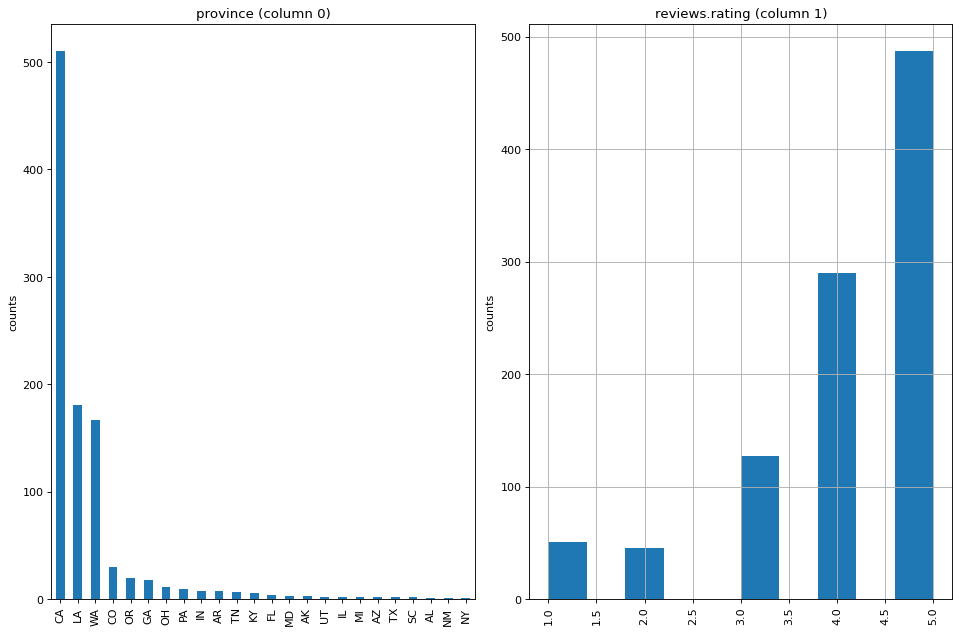

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

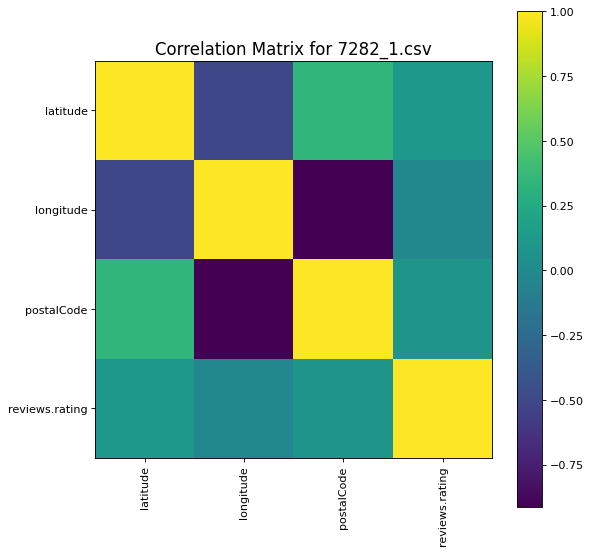

In [ ]:
plotCorrelationMatrix(df1, 8)

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

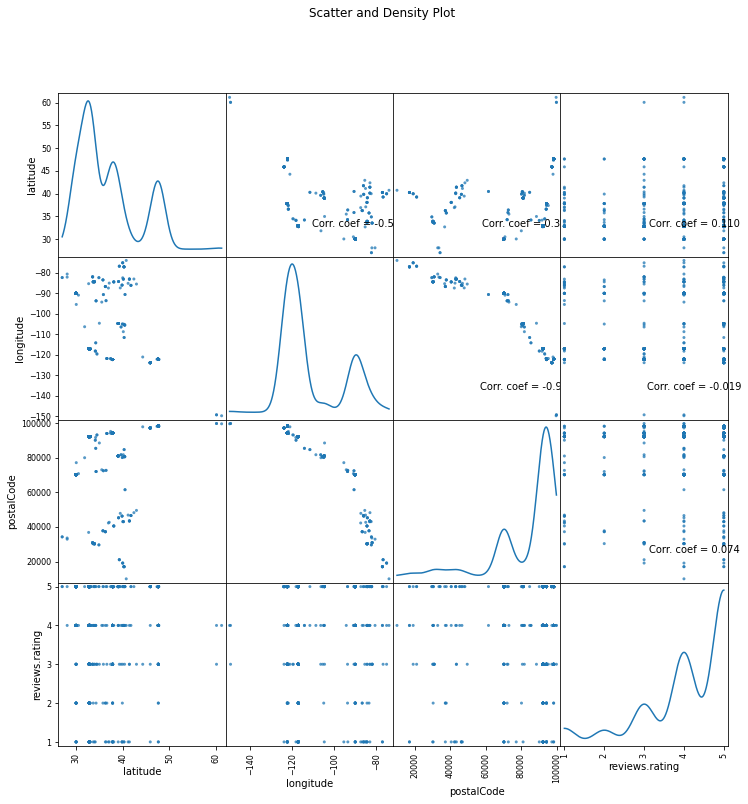

In [ ]:
plotScatterMatrix(df1, 12, 10)

In [ ]:
state_trips = pd.read_csv('State_trips.csv')
state_trips.head(5)

,Unnamed: 0,Level,Date,State Postal Code,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,0,State,2019/01/01,NV,"753,054","2,272,063","9,139,676","2,999,886","2,181,216","1,039,500","1,378,024","1,108,436","222,837","93,301","73,578","24,471","18,427",32-00000-20190101,0,1
1,1,State,2019/01/01,FL,"4,524,666","16,709,556","55,258,300","16,036,792","14,469,767","6,658,624","7,977,612","6,604,304","2,113,009","796,740","412,224","95,341","93,887",12-00000-20190101,0,1
2,2,State,2019/01/01,DC,"241,030","459,278","3,114,055","1,314,825","833,796","367,547","344,116","183,744","42,096","10,730","8,109","3,476","5,616",11-00000-20190101,0,1
3,3,State,2019/01/01,DE,"224,457","739,757","2,420,942","584,323","640,348","305,441","370,359","314,102","128,454","50,542","22,701","2,474","2,198",10-00000-20190101,0,1
4,4,State,2019/01/01,CT,"853,894","2,707,851","9,468,961","2,375,021","2,618,933","1,189,575","1,331,356","1,211,252","449,947","192,960","56,618","12,031","31,268",09-00000-20190101,0,1


In [ ]:
state_trips.dtypes

Unnamed: 0                         int64
Level                             object
Date                              object
State Postal Code                 object
Population Staying at Home        object
Population Not Staying at Home    object
Number of Trips                   object
Number of Trips <1                object
Number of Trips 1-3               object
Number of Trips 3-5               object
Number of Trips 5-10              object
Number of Trips 10-25             object
Number of Trips 25-50             object
Number of Trips 50-100            object
Number of Trips 100-250           object
Number of Trips 250-500           object
Number of Trips >=500             object
Row ID                            object
Week                               int64
Month                              int64
dtype: object

In [ ]:
state_trips['Population Staying at Home'] = state_trips['Population Staying at Home'].str.replace(r'[^\w\s]+', '')
state_trips['Population Not Staying at Home'] = state_trips['Population Not Staying at Home'].str.replace(r'[^\w\s]+', '')
state_trips['Number of Trips'] = state_trips['Number of Trips'].str.replace(r'[^\w\s]+', '')
state_trips['Number of Trips <1'] = state_trips['Number of Trips <1'].str.replace(r'[^\w\s]+', '')
state_trips['Number of Trips 1-3'] = state_trips['Number of Trips 1-3'].str.replace(r'[^\w\s]+', '')
state_trips['Number of Trips 3-5'] = state_trips['Number of Trips 3-5'].str.replace(r'[^\w\s]+', '')
state_trips['Number of Trips 5-10'] = state_trips['Number of Trips 5-10'].str.replace(r'[^\w\s]+', '')
state_trips['Number of Trips 10-25'] = state_trips['Number of Trips 10-25'].str.replace(r'[^\w\s]+', '')
state_trips['Number of Trips 25-50'] = state_trips['Number of Trips 25-50'].str.replace(r'[^\w\s]+', '')
state_trips['Number of Trips 50-100'] = state_trips['Number of Trips 50-100'].str.replace(r'[^\w\s]+', '')
state_trips['Number of Trips 100-250'] = state_trips['Number of Trips 100-250'].str.replace(r'[^\w\s]+', '')
state_trips['Number of Trips 250-500'] = state_trips['Number of Trips 250-500'].str.replace(r'[^\w\s]+', '')
state_trips['Number of Trips >=500'] = state_trips['Number of Trips >=500'].str.replace(r'[^\w\s]+', '')

In [ ]:
state_trips['Population Staying at Home'] = state_trips['Population Staying at Home'].astype(float)
state_trips['Population Not Staying at Home'] = state_trips['Population Not Staying at Home'].astype(float)
state_trips['Number of Trips'] = state_trips['Number of Trips'].astype(float)
state_trips['Number of Trips <1'] = state_trips['Number of Trips <1'].astype(float)
state_trips['Number of Trips 1-3'] = state_trips['Number of Trips 1-3']. astype(float)
state_trips['Number of Trips 3-5'] = state_trips['Number of Trips 3-5']. astype(float)
state_trips['Number of Trips 5-10'] = state_trips['Number of Trips 5-10']. astype(float)
state_trips['Number of Trips 10-25'] = state_trips['Number of Trips 10-25']. astype(float)
state_trips['Number of Trips 25-50'] = state_trips['Number of Trips 25-50']. astype(float)
state_trips['Number of Trips 50-100'] = state_trips['Number of Trips 50-100']. astype(float)
state_trips['Number of Trips 100-250'] = state_trips['Number of Trips 100-250']. astype(float)
state_trips['Number of Trips 250-500'] = state_trips['Number of Trips 250-500']. astype(float)
state_trips['Number of Trips >=500'] = state_trips['Number of Trips >=500']. astype(float)

In [ ]:
state_trips.dtypes

Unnamed: 0                          int64
Level                              object
Date                               object
State Postal Code                  object
Population Staying at Home        float64
Population Not Staying at Home    float64
Number of Trips                   float64
Number of Trips <1                float64
Number of Trips 1-3               float64
Number of Trips 3-5               float64
Number of Trips 5-10              float64
Number of Trips 10-25             float64
Number of Trips 25-50             float64
Number of Trips 50-100            float64
Number of Trips 100-250           float64
Number of Trips 250-500           float64
Number of Trips >=500             float64
Row ID                             object
Week                                int64
Month                               int64
dtype: object

In [ ]:
state_trips.describe()

,Unnamed: 0,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Week,Month
count,53805.000000,5.380500e+04,5.380500e+04,5.380500e+04,5.380500e+04,5.380500e+04,5.380500e+04,5.380500e+04,5.380500e+04,5.380500e+04,5.380500e+04,5.380500e+04,53805.000000,53805.000000,53805.000000,53805.000000
mean,26902.000000,1.432474e+06,4.980950e+06,2.357933e+07,5.990667e+06,5.842136e+06,2.868279e+06,3.622828e+06,3.521378e+06,1.138800e+06,3.768224e+05,1.569631e+05,34227.155506,27227.571192,25.163033,6.318483
std,15532.309954,1.740467e+06,5.607973e+06,2.625515e+07,7.009742e+06,6.548189e+06,3.147228e+06,3.979474e+06,3.882363e+06,1.259581e+06,4.075116e+05,1.691671e+05,39458.758718,40560.783344,14.622392,3.353319
min,0.000000,1.028030e+05,3.709990e+05,9.222940e+05,1.330180e+05,2.250660e+05,1.136430e+05,1.091960e+05,1.037930e+05,2.093300e+04,3.827000e+03,8.070000e+02,373.000000,235.000000,0.000000,1.000000
25%,13451.000000,3.787990e+05,1.380622e+06,5.928113e+06,1.498299e+06,1.519463e+06,7.327430e+05,9.051360e+05,9.087050e+05,3.080230e+05,1.211120e+05,4.853100e+04,8624.000000,5375.000000,13.000000,3.000000
50%,26902.000000,9.152690e+05,3.507859e+06,1.588258e+07,3.817707e+06,3.936450e+06,1.954608e+06,2.443108e+06,2.393933e+06,7.947720e+05,2.785630e+05,1.122020e+05,23361.000000,13472.000000,25.000000,6.000000
75%,40353.000000,1.742276e+06,5.782368e+06,2.943562e+07,7.423549e+06,7.291675e+06,3.602559e+06,4.589455e+06,4.634439e+06,1.449667e+06,4.569000e+05,1.964540e+05,43062.000000,31476.000000,38.000000,9.000000
max,53804.000000,1.571927e+07,3.367588e+07,2.068641e+08,5.853510e+07,5.722232e+07,2.693800e+07,3.072093e+07,3.077490e+07,9.756023e+06,3.330076e+06,1.863349e+06,365897.000000,606342.000000,52.000000,12.000000


In [ ]:
state_trips=state_trips.rename(columns={'State Postal Code':'State_Postal_Code'})
state_trips=state_trips.rename(columns={'Population Staying at Home':'Population_Staying_at_Home'})
state_trips=state_trips.rename(columns={'Population Not Staying at Home':'Population_Not_Staying_at_Home'})
state_trips=state_trips.rename(columns={'Number of Trips':'Number_of_Trips'})

In [ ]:
from pandasql import sqldf
pysqldf = lambda sql : sqldf(sql,globals()) 

In [ ]:
monthly = 'SELECT Month,avg(Number_of_Trips) as average\
       FROM state_trips\
       group by Month\
       order by average desc' 
monthly = pysqldf(monthly) 

In [ ]:
monthly

,Month,average
0,5,2.458459e+07
1,6,2.452827e+07
2,9,2.418430e+07
3,4,2.410317e+07
4,7,2.402605e+07
5,8,2.401650e+07
6,3,2.378572e+07
7,10,2.371346e+07
8,11,2.334714e+07
9,2,2.270176e+07


In [ ]:
Weekly = 'SELECT Week,avg(Number_of_Trips) as average\
       FROM state_trips\
       group by Week\
       order by average desc\
       limit 10' 
Weekly = pysqldf(Weekly)
Weekly

,Week,average
0,20,2.529054e+07
1,22,2.487483e+07
2,23,2.473926e+07
3,37,2.454073e+07
4,21,2.450738e+07
5,19,2.449188e+07
6,24,2.441741e+07
7,10,2.441506e+07
8,15,2.439929e+07
9,17,2.433943e+07


In [ ]:
hm_data=state_trips[['Number_of_Trips', 'Population_Staying_at_Home',
                        'Population_Not_Staying_at_Home','Number of Trips <1',
                        'Number of Trips >=500']].corr()

<AxesSubplot:>

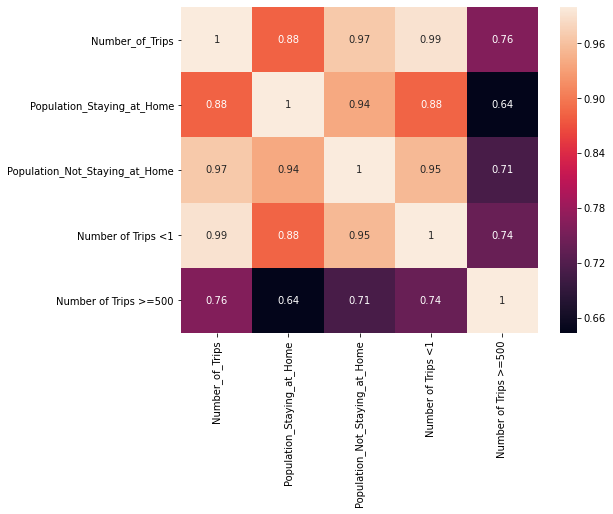

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(hm_data,annot=True)